In [111]:
#--------------------------------------------------------------
# a python sample submission for the DSM Datathon Kaggle Competition
#
# this is based on the past performance of the punters
#
# it will score 0.56570 on the public leaderboard
#--------------------------------------------------------------

import csv
import pandas as pd
import numpy as np
strip = lambda x:x.strip()

myDataFolder = 'datathon_data/data/'
compDataFolder = 'datathon_data/'

##sample submission file
submission_file = 'sample_submission_bet_size.csv'

##the new submission file
out_file = 'sample_submission_past_history_py.csv'

##the historical files
historical_files =  ['Datathon WC Data Games 1-10.csv'
                      ,'Datathon WC Data Games 11-20.csv'
                      ,'Datathon WC Data Games 21-30.csv'
                      ,'Datathon WC Data Games 31-40.csv'
                      ,'Datathon WC Data Games QTR Finals.csv'
                     ]



#append the root folder to the name
submission_file 	= myDataFolder + submission_file
out_file 			= myDataFolder + out_file

#read the submision file
sample_submission  = pd.read_csv(submission_file, index_col=0)

#cache datafiles to stack later
data_cache = []

#read in the historical data and filter
for file in historical_files:

    #read in the data  
    d = pd.read_csv(compDataFolder + file)
  
    #trim the white space
    d['STATUS_ID'] = d['STATUS_ID'].apply(strip)
    d['BID_TYP'] = d['BID_TYP'].apply(strip)

    
    

    #the columns of interest 
    requiredInputColumns = ['ACCOUNT_ID','BID_TYP','PRICE_TAKEN','BET_SIZE','STATUS_ID','PROFIT_LOSS']
    requiredOutputColumns = ['ACCOUNT_ID','PROFIT_LOSS1']

    #rows of interest - just the settled bets
    #requiredRows = d['STATUS_ID'] == 'S'

    #filter columns and rows
    #data = d.loc[:,requiredInputColumns]
    data = d
    
    #correct the profit_loss calculation
    data.loc[:,'PROFIT_LOSS1'] = 0.0

    r1 = (data['PROFIT_LOSS'] > 0) & (data['STATUS_ID'] == 'S')
    r2 = (data['PROFIT_LOSS'] < 0) & (data['STATUS_ID'] == 'S')
    #r3 = (data['STATUS_ID'] == 'C')


    data.loc[r1,'PROFIT_LOSS1'] = +1.0
    data.loc[r2,'PROFIT_LOSS1'] = -1.0
    #data.loc[r3,'PROFIT_LOSS1'] = +0.5
    



    #aggregate profit by accountID
    data = data.loc[:,requiredOutputColumns]
    this_profit_loss = data.groupby('ACCOUNT_ID').aggregate(np.sum)  
    

	#add to cache    
    data_cache.append(this_profit_loss)


#all files processed, now stack data
tot_profit_loss =  pd.concat(data_cache)

#convert index to column
tot_profit_loss['ACCOUNT_ID'] = tot_profit_loss.index

#aggregate again (over all files)
tot_profit_loss = tot_profit_loss.groupby('ACCOUNT_ID').aggregate(np.sum)  


#now create the submission file  
submit = sample_submission.join(tot_profit_loss)


#those who never appeared before - give a zero
newPunters= submit['PROFIT_LOSS1'] != submit['PROFIT_LOSS1'] 
submit.loc[newPunters, 'PROFIT_LOSS1'] = -50.0

#profit becomes the prediction
submit.drop('Prediction', axis=1, inplace=True)
submit.rename(columns={'PROFIT_LOSS1': 'Prediction'}, inplace=True)

#quick look
print (tot_profit_loss.describe())
print (submit.describe())

#create the submission file
submit.to_csv(out_file)

/Users/Soma/.pyenv/versions/3.5.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Soma/.pyenv/versions/3.5.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


       PROFIT_LOSS1
count  21020.000000
mean      -0.000571
std      109.268338
min   -10844.000000
25%       -5.000000
50%       -1.000000
75%        2.000000
max     3358.000000
         Prediction
count   7374.000000
mean      -6.096555
std      170.814910
min   -10844.000000
25%      -36.000000
50%       -5.000000
75%        5.000000
max     3358.000000


(999000, 1025000)

/Users/Soma/.pyenv/versions/3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


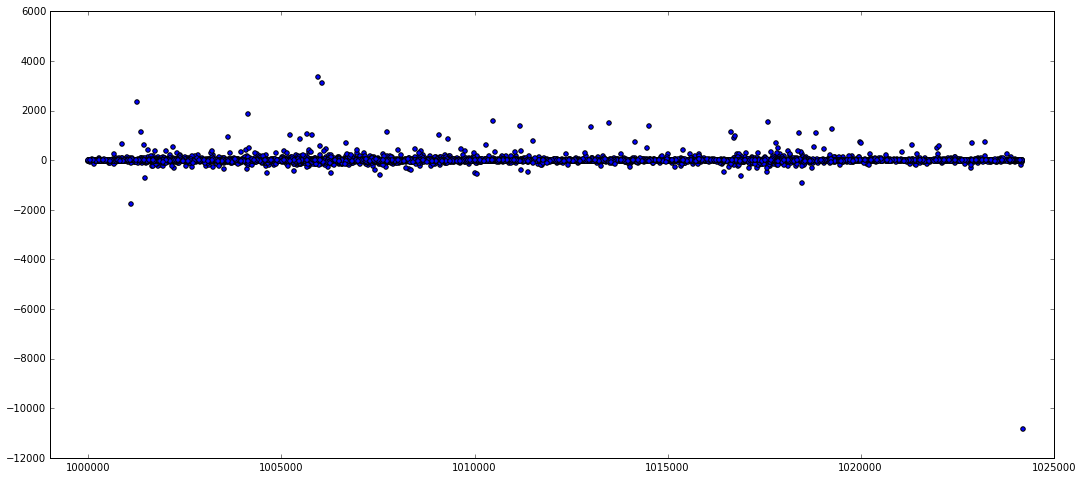

In [4]:
#to check the destribution.
import matplotlib.pyplot as plt
%matplotlib inline
x=submit.index
y=submit['Prediction']

plt.figure(figsize=(18,8))
plt.scatter(x,y)
plt.xlim(999000, 1025000) 



(-500, 500)

/Users/Soma/.pyenv/versions/3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


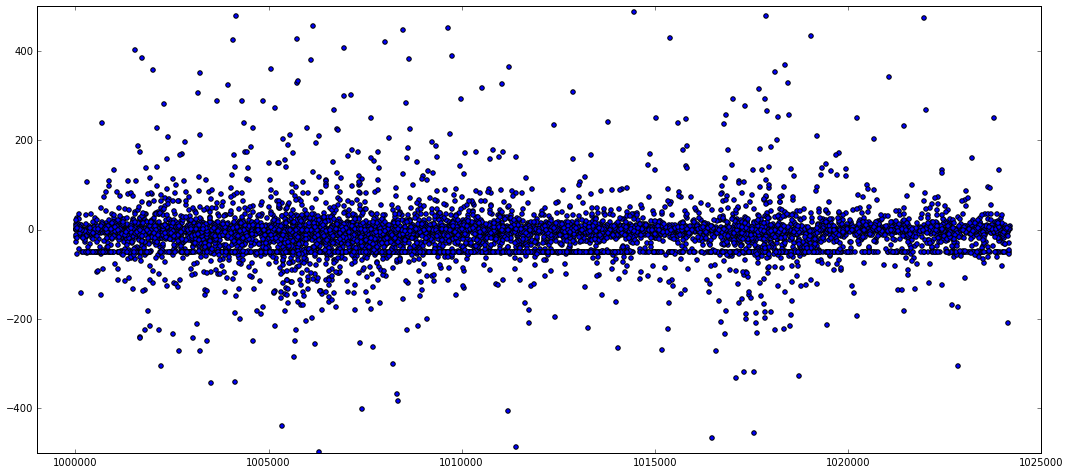

In [5]:
#to check the destribution.
import matplotlib.pyplot as plt
%matplotlib inline
x=submit.index
y=submit['Prediction']

plt.figure(figsize=(18,8))
plt.scatter(x,y)
plt.xlim(999000, 1025000) 
plt.ylim(-500, 500) 


# grouping by a location.

In [6]:

#cache datafiles to stack later
data_cache_location = []

#read in the historical data and filter
for file in historical_files:

    #read in the data  
    d = pd.read_csv(compDataFolder + file)
  
    #trim the white space
    d['STATUS_ID'] = d['STATUS_ID'].apply(strip)
    d['BID_TYP'] = d['BID_TYP'].apply(strip)
    

    #the columns of interest 
    requiredInputColumns = ['ACCOUNT_ID','BID_TYP','PRICE_TAKEN','BET_SIZE','STATUS_ID','PROFIT_LOSS', 'COUNTRY_OF_RESIDENCE_NAME']
    requiredOutputColumns = ['COUNTRY_OF_RESIDENCE_NAME','PROFIT_LOSS1']



    #filter columns and rows
    data = d.loc[:,requiredInputColumns]

    #correct the profit_loss calculation
    data.loc[:,'PROFIT_LOSS1'] = 0.0

    r1 = (data['PROFIT_LOSS'] > 0) & (data['STATUS_ID'] == 'S')
    r2 = (data['PROFIT_LOSS'] < 0) & (data['STATUS_ID'] == 'S')



    data.loc[r1,'PROFIT_LOSS1'] = +1.0
    data.loc[r2,'PROFIT_LOSS1'] = -1.0

    



    #aggregate profit by accountID
    data = data.loc[:,requiredOutputColumns]
    this_profit_loss = data.groupby('COUNTRY_OF_RESIDENCE_NAME').aggregate(np.sum)  

	#add to cache    
    data_cache_location.append(this_profit_loss)


#all files processed, now stack data
tot_profit_loss_location =  pd.concat(data_cache_location)

#convert index to column
tot_profit_loss_location['COUNTRY_OF_RESIDENCE_NAME'] = tot_profit_loss_location.index

#aggregate again (over all files)
tot_profit_loss_location = tot_profit_loss_location.groupby('COUNTRY_OF_RESIDENCE_NAME').aggregate(np.sum)  


#quick look
df_location = tot_profit_loss_location.sort_values(by='PROFIT_LOSS1', ascending=False)

/Users/Soma/.pyenv/versions/3.5.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Soma/.pyenv/versions/3.5.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


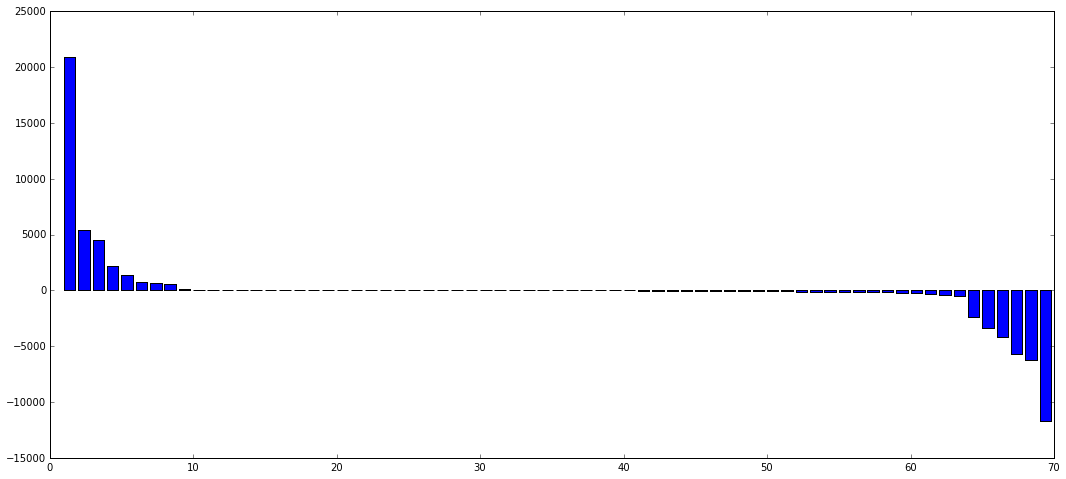

In [7]:
#to check the destribution.
x=range(1,70)
y=df_location['PROFIT_LOSS1']

plt.figure(figsize=(18,8))
plt.bar(x,y)

plt.show()

In [8]:
df_location.loc[:,'Location_penalty'] = df_location['PROFIT_LOSS1'] * 0.01
df_location

,PROFIT_LOSS1,Location_penalty
COUNTRY_OF_RESIDENCE_NAME,,
"Virgin Islands, British",20898,208.98
Seychelles,5398,53.98
Dominica,4552,45.52
Poland,2174,21.74
New Zealand,1401,14.01
Ireland,722,7.22
Belarus,698,6.98
Latvia,611,6.11
Netherlands,101,1.01


In [10]:
#read in the historical data and filter
for file in historical_files:

    #read in the data  
    d = pd.read_csv(compDataFolder + file)
  
    #trim the white space
    d['STATUS_ID'] = d['STATUS_ID'].apply(strip)
    d['BID_TYP'] = d['BID_TYP'].apply(strip)

    for index in d.index:
        for country in df_location.index:
            if country == d.loc[index,'COUNTRY_OF_RESIDENCE_NAME' ]:
                d.loc[index,'Location_penalty'] = df_location.loc[country,'Location_penalty']



/Users/Soma/.pyenv/versions/3.5.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


KeyboardInterrupt: 

In [ ]:
#to check the destribution.
import matplotlib.pyplot as plt
%matplotlib inline
x=features_data['ACCOUNT_ID']
y=features_data['TOTAL_BET']

plt.figure(figsize=(18,8))
plt.scatter(x,y)


# Using new features.

#### Do not worry. Just more punters.

In [68]:
new_data = pd.read_csv('datathon_data/semi_and_final_features_forAccountId.csv')
new_data

,EVENT_ID,TRANSACTION_COUNT,Account_ID,STATUS_ID,INPLAY_BET,AVG_BET_SIZE,MAX_BET_SIZE,MIN_BET_SIZE,STDEV_BET_SIZE
0,101187238,6,1000002,C,N,76.192150,189.690000,7.587600,76.803761
1,101187238,2,1000002,S,N,278.844300,379.380000,178.308600,142.178950
2,101187238,43,1000002,S,Y,142.274117,758.760000,3.793800,190.065261
3,101187943,8,1000002,C,N,169.758000,471.550000,3.772400,188.339556
4,101187943,69,1000002,S,Y,182.086641,692.838984,3.772400,150.043870
5,101191295,2,1000002,S,N,118.650076,192.520000,44.780152,104.467848
6,101191295,11,1000002,S,Y,68.138079,248.350800,11.377932,79.751261
7,101187238,1,1000003,S,N,20.000000,20.000000,20.000000,0.000000
8,101187943,1,1000003,S,N,50.000000,50.000000,50.000000,0.000000
9,101187943,1,1000004,S,N,943.100000,943.100000,943.100000,0.000000


In [69]:
#I should delete the irrelevant punters, yeah?
new_data = new_data[new_data['Account_ID'].isin(submit.index)]
new_data

,EVENT_ID,TRANSACTION_COUNT,Account_ID,STATUS_ID,INPLAY_BET,AVG_BET_SIZE,MAX_BET_SIZE,MIN_BET_SIZE,STDEV_BET_SIZE
0,101187238,6,1000002,C,N,76.192150,189.690000,7.587600,76.803761
1,101187238,2,1000002,S,N,278.844300,379.380000,178.308600,142.178950
2,101187238,43,1000002,S,Y,142.274117,758.760000,3.793800,190.065261
3,101187943,8,1000002,C,N,169.758000,471.550000,3.772400,188.339556
4,101187943,69,1000002,S,Y,182.086641,692.838984,3.772400,150.043870
5,101191295,2,1000002,S,N,118.650076,192.520000,44.780152,104.467848
6,101191295,11,1000002,S,Y,68.138079,248.350800,11.377932,79.751261
9,101187943,1,1000004,S,N,943.100000,943.100000,943.100000,0.000000
10,101187238,1,1000005,L,N,18.969000,18.969000,18.969000,0.000000
11,101187238,7,1000005,S,Y,56.907000,94.845000,18.969000,24.488874


In [70]:
new_data['BETSIZE_PENALTY'] = new_data['TRANSACTION_COUNT'] * new_data['AVG_BET_SIZE'] / 1000000
new_data = new_data.groupby('Account_ID').aggregate(np.sum) 
new_data = new_data.sort("STDEV_BET_SIZE")
new_data['STDEV_PENALTY'] = new_data['STDEV_BET_SIZE'] * 0.001

/Users/Soma/.pyenv/versions/3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Soma/.pyenv/versions/3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [71]:
new_data

,EVENT_ID,TRANSACTION_COUNT,AVG_BET_SIZE,MAX_BET_SIZE,MIN_BET_SIZE,STDEV_BET_SIZE,BETSIZE_PENALTY,STDEV_PENALTY
Account_ID,,,,,,,,
1007011,202379238,2,239.110000,239.110000,239.110000,0.000000,0.000239,0.000000
1003427,202375886,2,1270.681757,1270.681757,1270.681757,0.000000,0.001271,0.000000
1008414,202374476,2,945.908154,945.908154,945.908154,0.000000,0.000946,0.000000
1003414,101187238,1,758.760000,758.760000,758.760000,0.000000,0.000759,0.000000
1022195,101187238,1,948.450000,948.450000,948.450000,0.000000,0.000948,0.000000
1022196,404751067,6,377.775000,377.775000,377.775000,0.000000,0.000567,0.000000
1022203,101191295,1,1406.898568,1406.898568,1406.898568,0.000000,0.001407,0.000000
1003405,505945009,5,5600.000000,5600.000000,5600.000000,0.000000,0.005600,0.000000
1003403,101187943,1,3000.000000,3000.000000,3000.000000,0.000000,0.003000,0.000000


In [112]:
submit = submit.sort_index()
submit

,Prediction
﻿Account_ID,
1000002,-13
1000004,-17
1000005,9
1000010,-28
1000014,2
1000017,12
1000019,1
1000022,-1
1000023,21


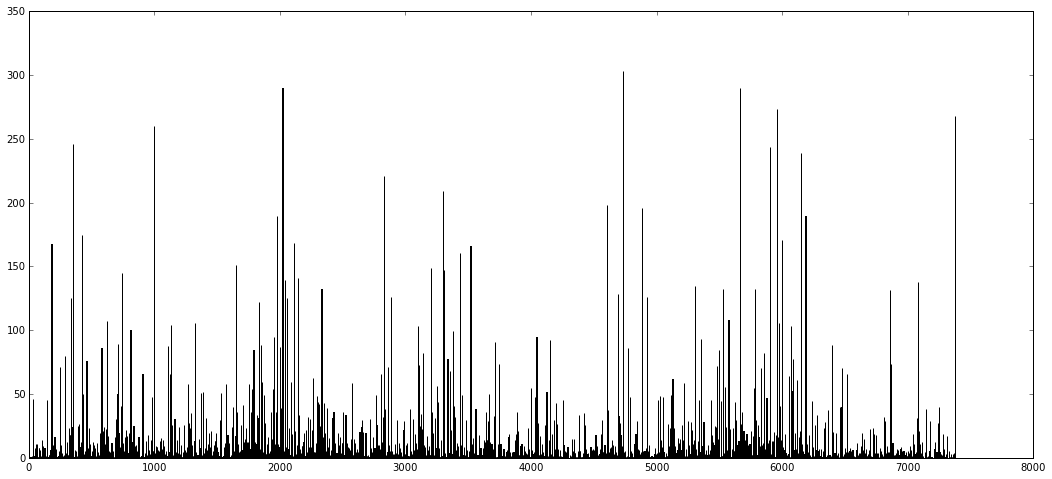

In [43]:
#to check the standard deviassion.
x=range(1,7375)
y=new_data['STDEV_PENALTY']

plt.figure(figsize=(18,8))
plt.bar(x,y)

plt.show()

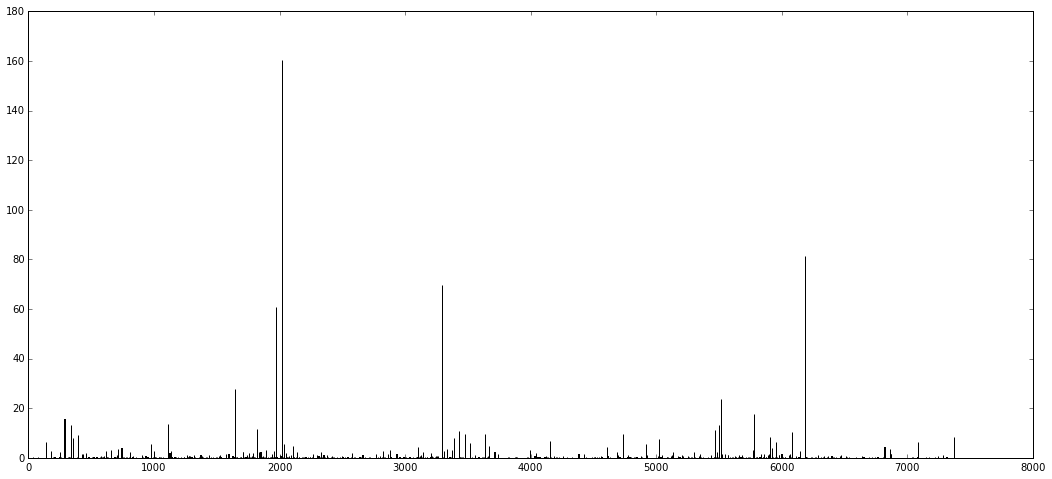

In [44]:
#to check how much money they bet.
x=range(1,7375)
y=new_data['BETSIZE_PENALTY']

plt.figure(figsize=(18,8))
plt.bar(x,y)

plt.show()

In [113]:
submit.loc[:,'Prediction2'] = submit.loc[:,'Prediction'] *5+ new_data.loc[:,'BETSIZE_PENALTY'] + new_data.loc[:,'STDEV_PENALTY'] *11
submit.loc[:,'Prediction3'] = (submit.loc[:,'Prediction'] * new_data.loc[:,'BETSIZE_PENALTY']) + new_data.loc[:,'STDEV_PENALTY'] 
submit.loc[:,'Prediction4'] = (submit.loc[:,'Prediction'] * new_data.loc[:,'STDEV_PENALTY']) + new_data.loc[:,'BETSIZE_PENALTY']
submit.loc[:,'Prediction5'] = submit.loc[:,'Prediction'] * new_data.loc[:,'BETSIZE_PENALTY'] * new_data.loc[:,'STDEV_PENALTY'] 

In [114]:
submit

,Prediction,Prediction2,Prediction3,Prediction4,Prediction5
﻿Account_ID,,,,,
1000002,-13,-54.729803,0.645111,-12.089415,-0.266955
1000004,-17,-84.999057,-0.016033,0.000943,-0.000000
1000005,9,45.313943,0.033453,0.256962,0.000141
1000010,-28,-136.587702,0.258670,-8.679344,-0.015927
1000014,2,10.000692,0.001385,0.000692,0.000000
1000017,12,60.992826,0.097283,1.083029,0.000639
1000019,1,5.000314,0.000314,0.000314,0.000000
1000022,-1,1.804463,0.615904,-0.615904,-0.001521
1000023,21,114.077308,0.995578,17.322000,0.141074


In [115]:
submit.drop('Prediction', axis=1, inplace=True)
submit.drop('Prediction5', axis=1, inplace=True)
submit.drop('Prediction3', axis=1, inplace=True)
submit.drop('Prediction4', axis=1, inplace=True)
submit.rename(columns={'Prediction2': 'Prediction'}, inplace=True)

submit.to_csv(out_file)